In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2,preprocess_input, decode_predictions
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [5]:
# Define the number of classes in your dataset
num_classes = 2 

# Load MobileNetV2 base model pre-trained on ImageNet data
base_model = MobileNetV2(weights='imagenet', include_top=False)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

    
# Create a custom model on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])


In [7]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
validation_split=0.2 # 20% of the data will be used for validation
)

In [8]:
# Specify the path to your animal dataset
train_data_dir = 'F:/BE_Practicals_sem_VII/cats_and_dogs_filtered/train'
validation_data_dir = 'F:/BE_Practicals_sem_VII/cats_and_dogs_filtered/validation'


# Generate training dataset
train_generator = datagen.flow_from_directory(
train_data_dir,
target_size=(224, 224),
batch_size=32,
class_mode='categorical',
subset='training',
)


# Generate validation dataset
validation_generator = datagen.flow_from_directory(
validation_data_dir,
target_size=(224, 224),
batch_size=32,
class_mode='categorical',
subset='validation',
)

Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [9]:
history = model.fit(
train_generator,
epochs=10,
validation_data=validation_generator
)

Epoch 1/10
50/50 [==============================] - 64s 1s/step - loss: 0.2646 - accuracy: 0.9419 - val_loss: 0.0763 - val_accuracy: 0.9700
Epoch 2/10
50/50 [==============================] - 40s 801ms/step - loss: 0.1058 - accuracy: 0.9681 - val_loss: 0.0763 - val_accuracy: 0.9750
Epoch 3/10
50/50 [==============================] - 50s 994ms/step - loss: 0.1000 - accuracy: 0.9737 - val_loss: 0.1194 - val_accuracy: 0.9600
Epoch 4/10
50/50 [==============================] - 46s 899ms/step - loss: 0.0882 - accuracy: 0.9744 - val_loss: 0.1087 - val_accuracy: 0.9700
Epoch 5/10
50/50 [==============================] - 42s 837ms/step - loss: 0.0573 - accuracy: 0.9787 - val_loss: 0.0672 - val_accuracy: 0.9800
Epoch 6/10
50/50 [==============================] - 42s 832ms/step - loss: 0.0712 - accuracy: 0.9787 - val_loss: 0.0594 - val_accuracy: 0.9750
Epoch 7/10
50/50 [==============================] - 49s 990ms/step - loss: 0.0539 - accuracy: 0.9850 - val_loss: 0.1934 - val_accuracy: 0.9500
Ep

In [22]:
images, labels = next(validation_generator)

In [34]:
import os

class_names = list(os.listdir('F:/BE_Practicals_sem_VII/cats_and_dogs_filtered/train'))

1/1 [==============================] - 0s 34ms/step


Text(0.5, 1.0, 'dogs')

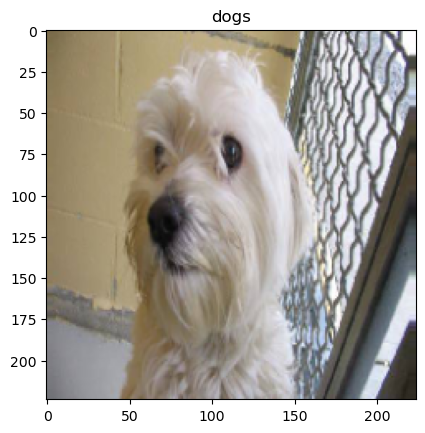

In [40]:
import random
import numpy as np
import matplotlib.pyplot as plt

n = random.randint(0,30)
plt.imshow(images[n])
img = np.expand_dims(images[n], 0)
pred = model.predict(img)
pred_ind = np.argmax(pred)
class_name = class_names[pred_ind]
plt.title(class_name)